Import relevant modules

In [19]:
import copy
import math
import numpy as np
import matplotlib.pyplot as plt

Import the dataset. 

In [20]:
import requests

# URL of the file
url = 'https://www.math.muni.cz/~kolacek/docs/frvs/M7222/data/AutoInsurSweden.txt'

# Fetch the content of the file
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Split the content into lines
    lines = response.text.splitlines()

    print("The first 15 lines of the dataset are as follows: ")     
    for line in lines[:15]:  # Display the first 15 lines
        print(line)
    
    # Skip the first 11 lines and start from line 12 onwards
    data_lines = lines[11:]
    
    # Create an array to store the two values from each row
    data_array = []
    
    # Process each line to split the values and store them in the array
    for line in data_lines:
        # Split the line by spaces (default split will handle multiple spaces)
        values = line.split()
        
        # If there are exactly two values, process them
        if len(values) == 2:
            # Replace commas with dots and convert to float
            value1 = float(values[0].replace(',', '.'))
            value2 = float(values[1].replace(',', '.'))
            
            # Append the values as a tuple to the array
            data_array.append([value1, value2])
    
    # Display the first few rows of the array
    print(f"\n The first 5 rows of cleaned data are {data_array[:5]}")  # Print the first 5 pairs
    print(f"\n The last row of cleaned data is: {data_array[-1:]}")  # Print the last pair
else:
    print(f"Failed to retrieve file. Status code: {response.status_code}")


The first 15 lines of the dataset are as follows: 
Auto Insurance in Sweden

In the following data
X = number of claims
Y = total payment for all the claims in thousands of Swedish Kronor
for geographical zones in Sweden
Reference: Swedish Committee on Analysis of Risk Premium in Motor Insurance
http://college.hmco.com/mathematics/brase/understandable_statistics/7e/students/datasets/
       slr/frames/frame.html

X	Y
108	392,5
19	46,2
13	15,7
124	422,2

 The first 5 rows of cleaned data are [[108.0, 392.5], [19.0, 46.2], [13.0, 15.7], [124.0, 422.2], [40.0, 119.4]]

 The last row of cleaned data is: [[26.0, 187.5]]


Store variables with labels for use later

In [54]:
title = "Auto Insurance in Sweden"
x_label = "Number of claims"
y_label = "Total payment, 1000s of Swedish Kronor"

Convert the data into a different format 

In [47]:
# Convert data_array into a numpy array
data_array = np.array(data_array)  # Convert list of lists to a numpy array

# Extract features (X values) ensuring a 2D shape
x_train = data_array[:, :-1]  # Extract all rows, all columns except last (X values)

# Extract target values (Y values)
y_train = data_array[:, -1]  # Extract all rows, last column (Y values)

print("\n x_train values: ", x_train[:5])  # First 5 values of x_train
print("\n y_train values: ", y_train[:5])  # First 5 values of y_train

print ('\nThe shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))


 x_train values:  [[108.]
 [ 19.]
 [ 13.]
 [124.]
 [ 40.]]

 y_train values:  [392.5  46.2  15.7 422.2 119.4]

The shape of x_train is: (63, 1)
The shape of y_train is:  (63,)
Number of training examples (m): 63


Plot the data

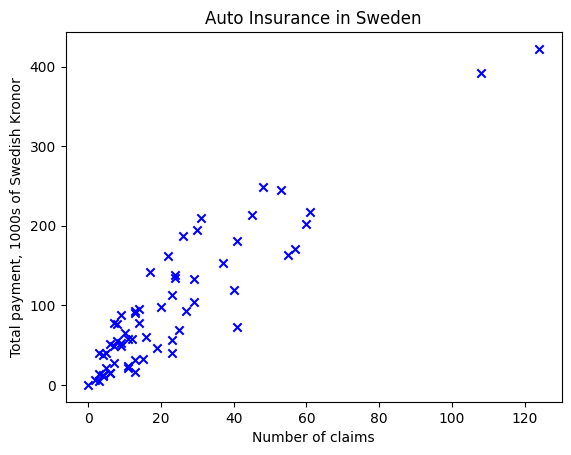

In [57]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker='x', c='b') 

# Set the title
plt.title(f"{title}")
# Set the y-axis label
plt.ylabel(f"{y_label}")
# Set the x-axis label
plt.xlabel(f"{x_label}")
plt.show()

Run linear regression using scikit-learn

Peak to Peak range by column in Raw        X: [124.]
Peak to Peak range by column in Normalized X: [5.35270174]
Intercept (b_norm): 98.18730158730159
Slope (w_norm): 79.08419747535676
Converted Intercept (b_original): 19.994485759114824
Converted Slope (w_original): 3.413823560066366


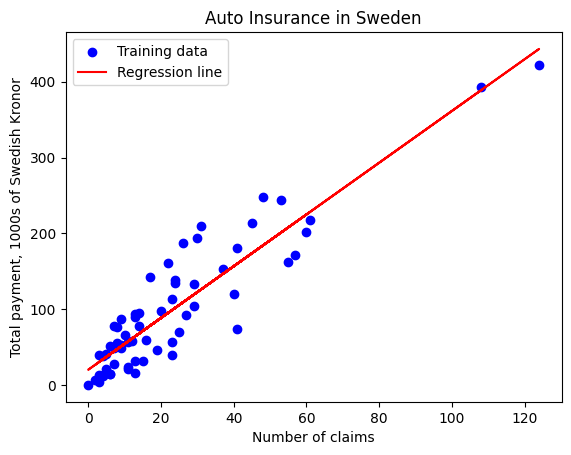

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Step 1: Normalize the Training Data
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)  # Normalized features

# Display range before and after normalization
print(f"Peak to Peak range by column in Raw        X: {np.ptp(x_train, axis=0)}")   
print(f"Peak to Peak range by column in Normalized X: {np.ptp(x_train_norm, axis=0)}")

# Step 2: Train the Linear Regression Model (Using Normalized Features)
model = LinearRegression()
model.fit(x_train_norm, y_train)

# Step 3: Extract Model Parameters (For Normalized Data)
b_norm = model.intercept_  # Intercept for normalized data
w_norm = model.coef_[0]    # Coefficient for normalized data
print(f"Intercept (b_norm): {b_norm}")
print(f"Slope (w_norm): {w_norm}")

# Step 4: Convert w and b Back to Original Scale
x_mean = scaler.mean_[0]  # Mean of original x_train
x_std = scaler.scale_[0]  # Standard deviation of original x_train

w_original = w_norm / x_std  # Convert w back to original scale
b_original = b_norm - (w_original * x_mean)  # Adjust intercept for mean shift
print(f"Converted Intercept (b_original): {b_original}")
print(f"Converted Slope (w_original): {w_original}")

# Step 5: Compute Predictions for Normalized Data
y_pred_norm = model.predict(x_train_norm)  # Predictions using normalized model

# Step 6: Compute Predictions for Original Data
y_pred_original = w_original * x_train + b_original  # Convert predictions to original scale

# Step 7: Plot Data and Regression Line (Original Scale)
plt.scatter(x_train, y_train, color='blue', label='Training data')  # Original data
plt.plot(x_train, y_pred_original, color='red', label='Regression line')  # Regression line on original scale
plt.xlabel(f"{x_label}")
plt.ylabel(f"{y_label}")
plt.title(f"{title}")
plt.legend()
plt.show()

Run linear regression manually 

In [31]:
# cost function for regularised linear regression
def compute_cost_linear_reg(X, y, w, b, lambda_):
    """
    Computes the cost over all examples
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """

    m  = X.shape[0]
    n  = len(w)
    cost = 0.
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b                                   #(n,)(n,)=scalar, see np.dot
        cost = cost + (f_wb_i - y[i])**2                               #scalar             
    cost = cost / (2 * m)                                              #scalar  
 
    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar
    
    total_cost = cost + reg_cost                                       #scalar
    return total_cost                                                  #scalar

In [32]:
# computes the gradient for linear regression
def compute_gradient_linear_reg(X, y, w, b, lambda_): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros(n) 
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]                 
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]               
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m   
    
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw

In [33]:
# function for batch gradient descent
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value 
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    controls amount of regularization
      
    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent

      J_history :     (ndarray Shape (num_iters,))  J,w history for graphing
      w_history:      (ndarray Shape (num_iters,))  w history for graphing
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [60]:
# Step 1 - normalise the features
x_mean_m = np.mean(x_train, axis=0)  # Compute mean for each feature
x_std_m = np.std(x_train, axis=0)    # Compute standard deviation for each feature
x_train_norm_m = (x_train - x_mean_m) / x_std_m  # Standardize the feature values

# Step 2: Initialize Parameters. 
# Note: Recall that the shape of w is (n,)
initial_w = np.random.randn(x_train.shape[1]) * 0.01  # Small random values for weights
initial_b = 1  # Initial bias value

# Step 3: Gradient Descent Settings
iterations = 1500   # Number of iterations for gradient descent
alpha = 0.005       # Learning rate
lambda_ = 0.01      # Regularization parameter

# Step 4: Train the Model Using Gradient Descent
w_norm_m, b_norm_m, J_hist, w_hist = gradient_descent(
    x_train_norm_m, y_train, initial_w, initial_b, 
    compute_cost_linear_reg, compute_gradient_linear_reg, 
    alpha, iterations, lambda_
)

print("Model parameters after training (normalized scale):")
print(f"w (normalized): {w_norm_m}")
print(f"b (normalized): {b_norm_m}")

Iteration    0: Cost  8397.77   
Iteration  150: Cost  2353.34   
Iteration  300: Cost  1009.83   
Iteration  450: Cost   711.21   
Iteration  600: Cost   644.84   
Iteration  750: Cost   630.08   
Iteration  900: Cost   626.80   
Iteration 1050: Cost   626.08   
Iteration 1200: Cost   625.91   
Iteration 1350: Cost   625.88   
Iteration 1499: Cost   625.87   
Model parameters after training (normalized scale):
w (normalized): [79.02877355]
b (normalized): 98.13455059389706



Converted Model Parameters (Original Scale):
w (original scale): [3.41143108]
b (original scale): 19.996533995317407


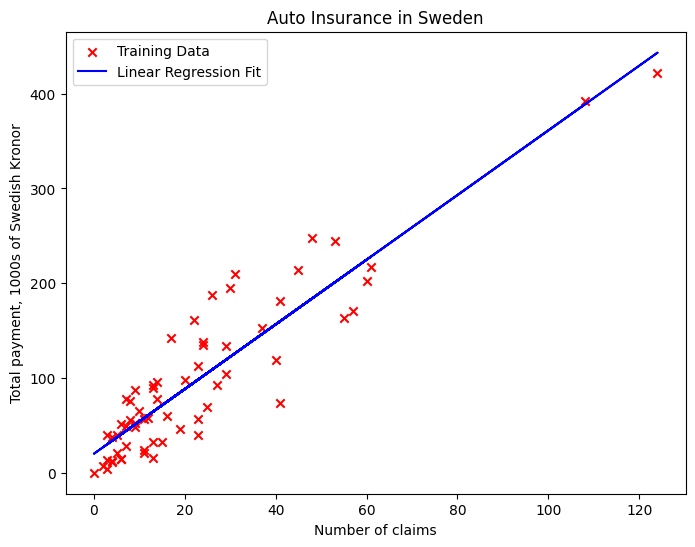

In [61]:
# Step 5: Compute Predictions
# Predictions are computed using the normalized weights and bias
y_pred_norm_m = np.dot(x_train_norm_m, w_norm_m) + b_norm_m  # Vectorized computation

# Step 6: Convert Model Parameters Back to Original Scale
# Convert w back to original scale
w_original_m = w_norm_m / x_std_m  

# Convert b back to original scale
b_original_m = b_norm_m - np.sum((w_norm_m * x_mean_m) / x_std_m)

print("\nConverted Model Parameters (Original Scale):")
print(f"w (original scale): {w_original_m}")
print(f"b (original scale): {b_original_m}")

# Step 7: Compute Predictions in Original Scale
# Predictions using the original scale coefficients
y_pred_original_m = np.dot(x_train, w_original_m) + b_original_m  

# Step 8: Plot the Results
plt.figure(figsize=(8, 6))

# Plot original data points
plt.scatter(x_train, y_train, marker='x', c='r', label="Training Data")

# Plot the regression line using the original scale predictions
plt.plot(x_train, y_pred_original, c="b", label="Linear Regression Fit")

# Set plot labels and title
plt.xlabel(f"{x_label}")
plt.ylabel(f"{y_label}")
plt.title(f"{title}")
plt.legend()
plt.show()

Comparing outputs of scikit-learn linear regression and the manual linear regression:

In [67]:
# Comparing difference between scikit-learn linear regression outputs and the manual linear regression outputs:
print(f"Difference in b of manual linear regression compared to scikit-learn linear regression {100 * (b_original_m - b_original) / b_original} %")
print(f"Difference in w of manual linear regression compared to scikit-learn linear regression {100 * (w_original_m - w_original) / w_original} %")

Difference in b of manual linear regression compared to scikit-learn linear regression 0.010244005408588091 %
Difference in w of manual linear regression compared to scikit-learn linear regression [-0.07008218] %


In [71]:
from sklearn.metrics import mean_squared_error

# Compute RMSE for the Sci-Kit learn model
rmse_model = np.sqrt(mean_squared_error(y_train, y_pred_original))

# Compute RMSE for the manual regression model
rmse_model_m = np.sqrt(mean_squared_error(y_train, y_pred_original_m))

# Baseline RMSE (based on predicting the mean) stated on the dataset webpage
baseline_rmse = 81

print(f"Sci-kit Learn linear regression model RMSE: {rmse_model}")
print(f"Manual linear regression Model RMSE: {rmse_model_m}")
print(f"Baseline RMSE: {baseline_rmse}")

if rmse_model < baseline_rmse:
    print("The Sci-kit learn linear regression model is performing better than the baseline.")
if rmse_model_m < baseline_rmse:
    print("The manual linear regression model is performing better than the baseline.")
else:
    print("The model is performing worse or similarly to the baseline.")

Sci-kit Learn linear regression model RMSE: 35.36582996879147
Manual linear regression Model RMSE: 35.36591273897385
Baseline RMSE: 81
The Sci-kit learn linear regression model is performing better than the baseline.
The manual linear regression model is performing better than the baseline.
